In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("husl")
plt.rc('font', size=12)  

sys.path.append("/home/alex/Dropbox/smc_hmc/python_smchmc/smc_sampler_functions/")
sys.path.append("/home/alex/Dropbox/smc_hmc/python_smchmc/")
sys.path.append("/home/alex/Dropbox/smc_hmc/python_smchmc/help/")

sys.path.append("/scratch/alexander/hsmc/smc_sampler_functions/")
sys.path.append("/scratch/alexander/hsmc/")
sys.path.append("/scratch/alexander/hsmc/help/")

import smc_sampler_functions.proposal_kernels
#path = os.getcwd()
#path = path.replace("/ipython_notebooks","")
#path = "/home/alex/inter_simulation_results/hsmc_harvard/results_simulation_log_cox"
#path = "/media/alex/Transcend/hsmc/results_simulation_log_cox"
path = "/scratch/alexander/hsmc/results_simulation_log_cox/"
os.chdir(path)
model_name = 'normal_mix'
names_files_list = os.listdir(path)
print(names_files_list)
import getsize_function

['log_coxsampler_HMC_L_random_ours_adaptive_rep_1_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_27_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_29_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_21_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_19_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_25_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_23_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_4_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_18_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_11_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_8_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_2_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_17_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_15_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_rep_13_dim_16384.p', 'log_coxsampler_HMC_L_random_ours_adaptive_

In [3]:
dim_list = [100, 400, 900, 1600, 2025, 4096, 16384]#, 50, 100]
dim_len = len(dim_list)
M = 30
names_samplers = ["sampler_HMC_L_random_ours_adaptive_", "sampler_HMC_L_random_ft_adaptive_","sampler_MALA_"]#, "sampler_RW_"]
names_prop = ['HMCAPR', 'HMCAFT', 'MALA']#, 'RW']
num_sampler = len(names_samplers)
norm_const = np.zeros((M, num_sampler, dim_len))
prob_positive = np.zeros((M, num_sampler, dim_len))
trace_mean_particles = np.zeros((M, num_sampler, dim_len))
#trace_var_particles = np.zeros((M, num_sampler, dim_len))
computational_load = np.zeros((M, num_sampler, dim_len))
particles_all = {str(dim) : np.zeros((M, num_sampler,dim)) for dim in dim_list}


In [4]:
for i_dim, dim in enumerate(dim_list):
    for m_rep in range(M):
        for i, name_sampler in enumerate(names_samplers):
            name_to_load = "log_cox"+name_sampler+"rep_%s_dim_%s.p"%(m_rep+1, dim)
            #print name_to_load
            try: 
                res_dict = pickle.load(open(name_to_load, 'rb'))
                norm_const[m_rep, i, i_dim] = sum(res_dict['Z_list'])
                particles_all[str(dim)][m_rep, i,:] = res_dict['particles_resampled'].mean(axis=0)
                trace_mean_particles[m_rep, i, i_dim] = res_dict['particles_resampled'].mean()
                #trace_var_particles[m_rep, i, i_dim] = res_dict['particles_resampled'].var(axis=1).mean()
                #computational_load[m_rep, i, i_dim] = len(res_dict['temp_list'])* len(res_dict['L_mean'])
                if 'PR' in names_prop[i]:
                    computational_load[m_rep, i, i_dim] = len(res_dict['temp_list'])* res_dict['L_mean'].mean()+(np.unique(res_dict['temp_list'])).shape[0]*res_dict['L_mean'].mean()
                else: 
                    computational_load[m_rep, i, i_dim] = len(res_dict['temp_list'])* res_dict['L_mean'].mean()
            except:
                print("could not load %s" %name_to_load)
                pass

could not load log_coxsampler_MALA_rep_1_dim_4096.p
could not load log_coxsampler_MALA_rep_2_dim_4096.p
could not load log_coxsampler_MALA_rep_3_dim_4096.p
could not load log_coxsampler_MALA_rep_4_dim_4096.p
could not load log_coxsampler_MALA_rep_5_dim_4096.p
could not load log_coxsampler_MALA_rep_6_dim_4096.p
could not load log_coxsampler_MALA_rep_7_dim_4096.p
could not load log_coxsampler_MALA_rep_8_dim_4096.p
could not load log_coxsampler_MALA_rep_9_dim_4096.p
could not load log_coxsampler_MALA_rep_10_dim_4096.p
could not load log_coxsampler_MALA_rep_11_dim_4096.p
could not load log_coxsampler_MALA_rep_12_dim_4096.p
could not load log_coxsampler_MALA_rep_13_dim_4096.p
could not load log_coxsampler_MALA_rep_14_dim_4096.p
could not load log_coxsampler_MALA_rep_15_dim_4096.p
could not load log_coxsampler_MALA_rep_16_dim_4096.p
could not load log_coxsampler_MALA_rep_17_dim_4096.p
could not load log_coxsampler_MALA_rep_18_dim_4096.p
could not load log_coxsampler_MALA_rep_19_dim_4096.p
co

/home/alexander/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/home/alexander/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/home/alexander/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/home/alexander/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.h

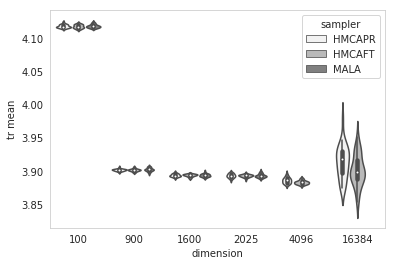

In [7]:
trace_mean_particles[:,2,5] = None
trace_mean_particles[:,2,6] = None
frames_list = []
for i_dim, dim in enumerate(dim_list):
    inter_frame = pd.DataFrame(trace_mean_particles[:,:,i_dim], columns=names_prop)
    inter_frame.colums = names_prop
    inter_frame['Dim'] = dim
    frames_list.append(inter_frame)
    del inter_frame
final_frame = pd.concat(frames_list)
#final_frame.columns[:-1] = names_prop

#final_frame = final_frame.rename(columns=names_columns)
final_frame = pd.melt(final_frame, id_vars=['Dim'])
final_frame.columns = ['dimension', 'sampler', 'tr mean']
#print()
sns.violinplot(x='dimension', y='tr mean', hue="sampler", data=final_frame.loc[final_frame['dimension'].isin([100, 900, 1600, 2025, 4096, 16384])], color="gray")#palette="muted")
plt.savefig('comparison_estimation_trace_mean_log_cox.pdf')


/home/alexander/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/home/alexander/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/home/alexander/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/home/alexander/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.h

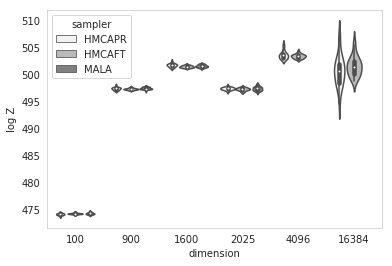

In [8]:
norm_const[:,2,5] = None
norm_const[:,2,6] = None
frames_list = []
for i_dim, dim in enumerate(dim_list):
    inter_frame = pd.DataFrame(norm_const[:,:,i_dim], columns=names_prop)
    inter_frame.colums = names_prop
    inter_frame['Dim'] = dim
    frames_list.append(inter_frame)
    del inter_frame
final_frame = pd.concat(frames_list)
#final_frame.columns[:-1] = names_prop

#final_frame = final_frame.rename(columns=names_columns)
final_frame = pd.melt(final_frame, id_vars=['Dim'])
final_frame.columns = ['dimension', 'sampler', 'log Z']
#print()
sns.violinplot(x='dimension', y='log Z', hue="sampler", data=final_frame.loc[final_frame['dimension'].isin([100, 900, 1600, 2025, 4096, 16384])], color="gray")# palette="muted")
plt.savefig('comparison_estimation_normalizing_constant_log_cox.pdf')
    


(1024, 4096)
[[0.00147757 0.00287    0.00281988 0.00490768 0.0094763  0.03795391]
 [0.00404775 0.00250383 0.00194759 0.00227912 0.00433416 0.00771435]
 [0.00204027 0.00358361 0.00739943 0.00800052 0.01484525        nan]]
[[  10.11763195   22.13225176   46.45827281   98.84161593  117.44661989
  1079.58832925]
 [  11.95418946    8.82364804   19.18047206   24.82250836   60.90801592
   215.18400433]
 [   8.22999216   19.17880137   34.57454109  105.52312816  235.10225224
     0.        ]]


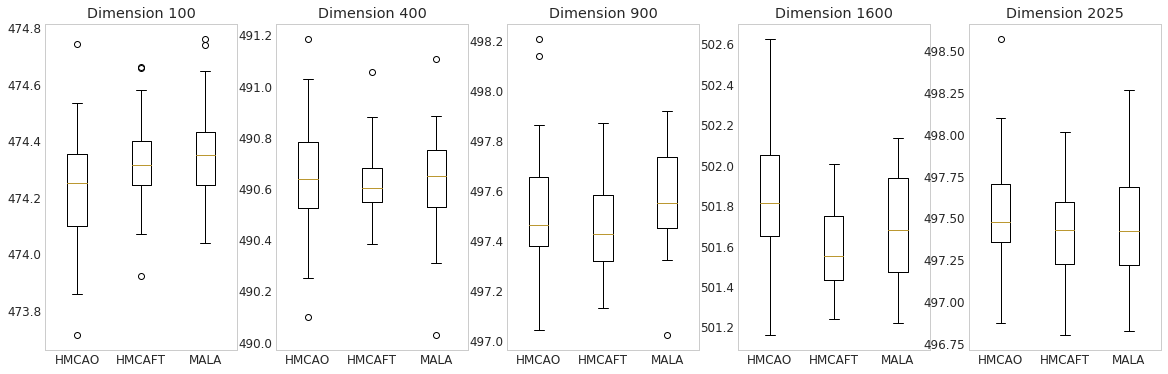

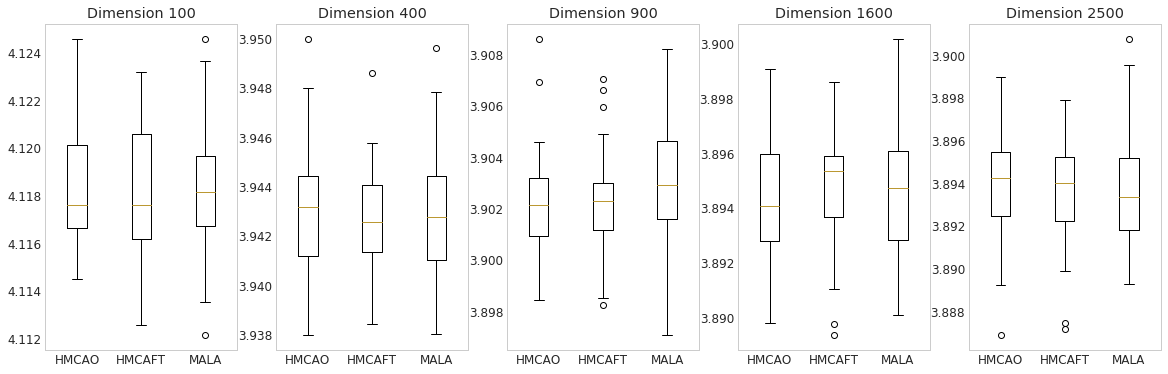

In [5]:

#sns.set_palette("PuBuGn_d")

print res_dict['particles_resampled'].shape
print trace_mean_particles.var(axis=0)*computational_load.mean(axis=0)
print norm_const.var(axis=0)*computational_load.mean(axis=0)
plt.figure(figsize=(20,6))
plt.subplot(151)
plt.title('Dimension 100')
plt.boxplot(norm_const[:,:,0], labels=names_prop)
plt.subplot(152)
plt.title('Dimension 400')
plt.boxplot(norm_const[:,:,1], labels=names_prop)
plt.subplot(153)
plt.title('Dimension 900')
plt.boxplot(norm_const[:,:,2], labels=names_prop)
plt.subplot(154)
plt.title('Dimension 1600')
plt.boxplot(norm_const[:,:,3], labels=names_prop)
plt.subplot(155)
plt.title('Dimension 2025')
plt.boxplot(norm_const[:,:,4], labels=names_prop)
plt.savefig('log_cox_boxplot_normconst.png'); plt.show()


plt.figure(figsize=(20,6))
plt.subplot(151)
plt.title('Dimension 100')
plt.boxplot(trace_mean_particles[:,:,0], labels=names_prop)
plt.subplot(152)
plt.title('Dimension 400')
plt.boxplot(trace_mean_particles[:,:,1], labels=names_prop)
plt.subplot(153)
plt.title('Dimension 900')
plt.boxplot(trace_mean_particles[:,:,2], labels=names_prop)
plt.subplot(154)
plt.title('Dimension 1600')
plt.boxplot(trace_mean_particles[:,:,3], labels=names_prop)
plt.subplot(155)
plt.title('Dimension 2500')
plt.boxplot(trace_mean_particles[:,:,4], labels=names_prop)

plt.savefig('log_cox_boxplot_trace_mean.png'); plt.show()

In [5]:
computational_load.mean(axis=0)

array([[ 248.99042488,  439.07051598,  705.04561363, 1037.84188739],
       [ 490.51751626,  524.96542341,  531.83054912,  580.03147552],
       [ 299.        ,  579.33333333,  998.84615385, 1590.94871795]])

In [6]:

name_to_load = "log_cox"+name_sampler+"rep_%s_dim_%s.p"%(m_rep+1, 900)
#print name_to_load
res_dict = pickle.load(open(name_to_load, 'rb'))
particles_all['400'].shape
#res_dict['parameters']['Y']

(39, 3, 400)

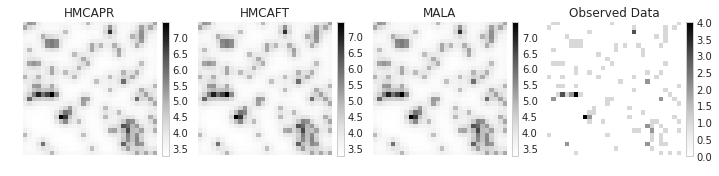

In [8]:
#x_res_matrixmean1 = res_first_iteration[0]['particles_resampled'].mean(axis=0).reshape(parameters_log_cox['N'],parameters_log_cox['N'])
ngrid = 30
x_res_matrixmean1 = particles_all[str(ngrid**2)][0,0,:].reshape(ngrid, ngrid)
#x_res_matrixmean2 = res_first_iteration[1]['particles_resampled'].mean(axis=0).reshape(parameters_log_cox['N'],parameters_log_cox['N'])
#x_res_matrixvar1 = res_first_iteration[0]['particles_resampled'].var(axis=0).reshape(parameters_log_cox['N'],parameters_log_cox['N'])
#x_res_matrixvar1 = res_repeated_sampling['mean_array'].var(axis=1)[0,:,:].reshape(parameters_log_cox['N'],parameters_log_cox['N'])
#x_res_matrixvar2 = res_first_iteration[1]['particles_resampled'].var(axis=0).reshape(parameters_log_cox['N'],parameters_log_cox['N'])


Y_matrix = res_dict['parameters']['Y'].reshape(ngrid,ngrid)
#Y_matrix_samled = Y_sampled.reshape(parameters_log_cox['N'],parameters_log_cox['N'])
#X_matrix = parameters_log_cox['X_true'].reshape(parameters_log_cox['N'],parameters_log_cox['N'])

plt.figure(figsize=(12,4))

plt.subplot(141)
plt.title('HMCAPR')
im = plt.imshow(particles_all[str(ngrid**2)][:,0,:].mean(axis=0).reshape(ngrid, ngrid),cmap='Greys')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(142)
plt.title('HMCAFT')
im = plt.imshow(particles_all[str(ngrid**2)][:,1,:].mean(axis=0).reshape(ngrid, ngrid),cmap='Greys')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(143)
plt.title('MALA')
im = plt.imshow(particles_all[str(ngrid**2)][:,2,:].mean(axis=0).reshape(ngrid, ngrid),cmap='Greys')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.axis('off')
#plt.subplot(234)
#plt.title('Latent field RW')
#im = plt.imshow(particles_all[str(ngrid**2)][:,3,:].mean(axis=0).reshape(ngrid, ngrid),cmap='jet')
#plt.colorbar(im,fraction=0.046, pad=0.04)


plt.subplot(144)
plt.title('Observed Data')
im = plt.imshow(Y_matrix,cmap='Greys')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.axis('off')

#plt.subplot(236)
#plt.title('Var Latent field HMCAO')
#im = plt.imshow(particles_all[str(ngrid**2)][:,0,:].var(axis=0).reshape(ngrid, ngrid),cmap='jet')
#plt.colorbar(im,fraction=0.046, pad=0.04)




#plt.subplot(233)
#plt.title('True latent field')
#im = plt.imshow(X_matrix,cmap='jet')
#plt.colorbar(im,fraction=0.046, pad=0.04)



plt.savefig('log_cox_model_dim_%s.pdf'%(dim), bbox_inches='tight')
plt.show()


In [10]:
(norm_const.var(axis=0))#*computational_load.mean(axis=0))[:,:]
norm_const

array([[[474.33873577, 490.29792256, 497.38904501, 501.78016721,
         494.97902441],
        [474.39671183, 490.71314796, 497.33463332, 501.72640063,
         493.88962161],
        [474.5183718 , 490.48729627, 497.51596473, 501.43812571,
           0.        ]],

       [[474.24120544, 491.01510308, 497.58677952, 501.6969745 ,
           0.        ],
        [474.44064371, 490.41240209, 497.76920538, 501.52253357,
           0.        ],
        [474.64696869, 490.43481966, 497.81982055, 501.64548316,
           0.        ]],

       [[474.29731223, 490.61965049, 497.42530612, 501.44216925,
           0.        ],
        [474.25092513, 490.60133843, 497.35401803, 501.42734386,
           0.        ],
        [474.33592688, 490.4184219 , 497.55660924, 501.67837199,
           0.        ]],

       [[474.37738682, 490.40623788, 497.41751152, 501.80376712,
           0.        ],
        [474.24914249, 490.55157133, 497.25070197, 501.65359225,
           0.        ],
        [474.30

In [10]:
from tabulate import tabulate

datadim100 = (norm_const.var(axis=0)*computational_load.mean(axis=0))[:,0]
datadim100 = np.round(datadim100/datadim100[0], decimals=3)

datadim400 = (norm_const.var(axis=0)*computational_load.mean(axis=0))[:,1]
datadim400 = np.round(datadim400/datadim400[0], decimals=3)

datadim900 = (norm_const.var(axis=0)*computational_load.mean(axis=0))[:,2]
datadim900 = np.round(datadim900/datadim900[0], decimals=3)

datadim1600 = (norm_const.var(axis=0)*computational_load.mean(axis=0))[:,3]
datadim1600 = np.round(datadim1600/datadim1600[0], decimals=3)

datadim2500 = (norm_const.var(axis=0)*computational_load.mean(axis=0))[:,4]
datadim2500 = np.round(datadim2500/datadim2500[0], decimals=3)

datadim4096 = (norm_const.var(axis=0)*computational_load.mean(axis=0))[:,5]
datadim4096 = np.round(datadim4096/datadim4096[0], decimals=3)

datadim16384 = (norm_const.var(axis=0)*computational_load.mean(axis=0))[:,6]
datadim16384 = np.round(datadim16384/datadim16384[0], decimals=3)


datadim100_mean = (trace_mean_particles.var(axis=0)*computational_load.mean(axis=0))[:,0]
datadim100_mean = np.round(datadim100_mean/datadim100_mean[0], decimals=3)

datadim400_mean = (trace_mean_particles.var(axis=0)*computational_load.mean(axis=0))[:,1]
datadim400_mean = np.round(datadim400_mean/datadim400_mean[0], decimals=3)

datadim900_mean = (trace_mean_particles.var(axis=0)*computational_load.mean(axis=0))[:,2]
datadim900_mean = np.round(datadim900_mean/datadim900_mean[0], decimals=3)

datadim1600_mean = (trace_mean_particles.var(axis=0)*computational_load.mean(axis=0))[:,3]
datadim1600_mean = np.round(datadim1600_mean/datadim1600_mean[0], decimals=3)

datadim2500_mean = (trace_mean_particles.var(axis=0)*computational_load.mean(axis=0))[:,4]
datadim2500_mean = np.round(datadim2500_mean/datadim2500_mean[0], decimals=3)

datadim4096_mean = (trace_mean_particles.var(axis=0)*computational_load.mean(axis=0))[:,5]
datadim4096_mean = np.round(datadim4096_mean/datadim4096_mean[0], decimals=3)

datadim16384_mean = (trace_mean_particles.var(axis=0)*computational_load.mean(axis=0))[:,6]
datadim16384_mean = np.round(datadim16384_mean/datadim16384_mean[0], decimals=3)


#datadim400 =  np.round(((norm_const.var(axis=0)*computational_load.mean(axis=0))[:,1]), decimals=3).flatten()
#datadim900 =  np.round(((norm_const.var(axis=0)*computational_load.mean(axis=0))[:,2]), decimals=3).flatten()


first_line = ['Dim']+names_prop+names_prop
second_line = [100]+datadim100.tolist()+datadim100_mean.tolist()
third_line = [400]+datadim400.tolist()+datadim400_mean.tolist()
fourth_line = [900]+datadim900.tolist()+datadim900_mean.tolist()
fith_line = [1600]+datadim1600.tolist()+datadim1600_mean.tolist()
sixth_line = [2500]+datadim2500.tolist()+datadim2500_mean.tolist()
seventh_line = [4096]+datadim4096.tolist()+datadim4096_mean.tolist()
eight_line = [16384]+datadim16384.tolist()+datadim16384_mean.tolist()
data = [first_line, second_line, third_line, fourth_line, fith_line, sixth_line, seventh_line, eight_line]
header = ["", '', '']
print(tabulate(data, header, tablefmt="latex", floatfmt=".2f"))



\begin{tabular}{lllllll}
\hline
       &        &        &       &        &        &       \\
\hline
 Dim   & HMCAPR & HMCAFT & MALA  & HMCAPR & HMCAFT & MALA  \\
 100   & 1.0    & 0.843  & 1.107 & 1.0    & 2.405  & 1.351 \\
 400   & 1.0    & 0.372  & 0.942 & 1.0    & 1.035  & 1.741 \\
 900   & 1.0    & 0.339  & 0.896 & 1.0    & 1.086  & 3.755 \\
 1600  & 1.0    & 0.226  & 0.895 & 1.0    & 0.446  & 1.577 \\
 2500  & 1.0    & 0.665  & 3.142 & 1.0    & 0.298  & 1.387 \\
 4096  & 1.0    & 0.139  & nan   & 1.0    & 0.225  & nan   \\
 16384 & 1.0    & 0.323  & nan   & 1.0    & 0.677  & nan   \\
\hline
\end{tabular}
